In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [218]:
df=pd.read_csv("Algerian_forest_fires_dataset_UPDATE_clean.csv")

In [219]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,2012-06-01
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1,2012-06-02
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,2012-06-03
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1,2012-06-04
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1,2012-06-05


In [220]:
df=df.drop("date",True)

In [221]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.035391,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


- FFMC --> large difference between the min value and 25% to max value
- DMC,DC,BUI,rain  --> large difference between the min value -75% and max value

 so there are major  outliers present in these features

In [222]:
def plot_dist(col,df):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
    ax1 =sns.distplot(df[col],ax=ax1) 
    ax1.set_title(f'{col}') 
    ax1.set_xlabel(f'{col}') 
    ax2 = sns.boxplot(data = df, x=col,ax=ax2);
    ax2.set_title(f'{col}') 
    ax2.set_xlabel(f'{col}')
    plt.figure(figsize=(30, 15))
    plt.show()

- **with respect to FFMC**

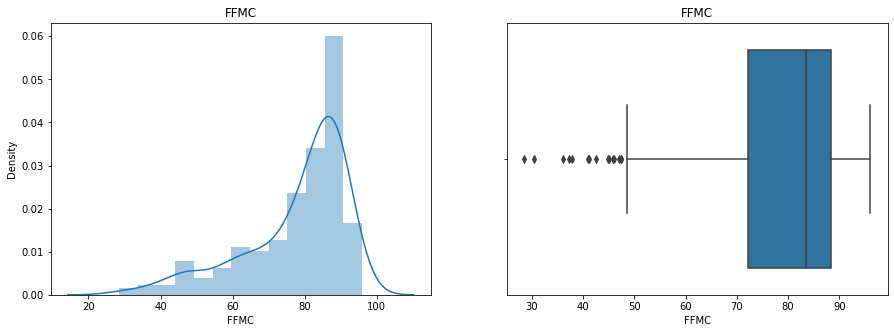

<Figure size 2160x1080 with 0 Axes>

In [223]:
plot_dist("FFMC",df)

In [224]:
#handeling the outliers with respect to FFMC 

In [225]:
# as in FFMC distriution is skewed we are using IQR method

In [226]:
q1=df["FFMC"].quantile(0.25)
q3=df["FFMC"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [227]:
lower_fence,upper_fence

(47.73750000000001, 112.63749999999999)

In [228]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [229]:
lower_extreme,upper_extreme

(23.40000000000002, 136.97499999999997)

In [230]:
df["FFMC"].describe()

count    244.000000
mean      77.887705
std       14.337571
min       28.600000
25%       72.075000
50%       83.500000
75%       88.300000
max       96.000000
Name: FFMC, dtype: float64

In [231]:
# theh upper range is not maching the max value .. we just need to remove outliers from lower side as  FFMC is left skewed

In [232]:
data=df.copy()
# making a copy of the data

In [233]:
data.loc[data["FFMC"]<=lower_fence,"FFMC"]=lower_fence

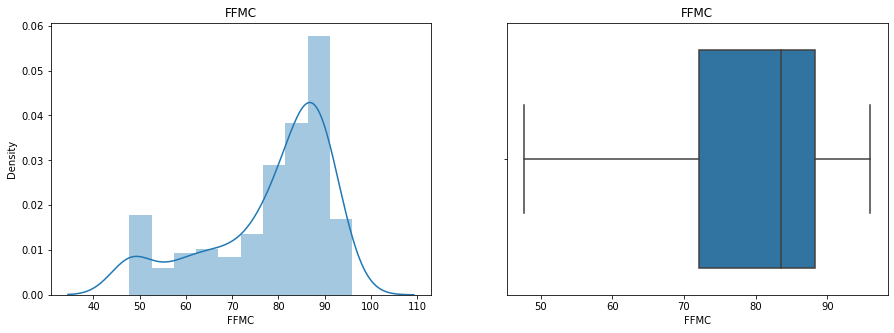

<Figure size 2160x1080 with 0 Axes>

In [234]:
plot_dist("FFMC",data)

- outliers are handeled in FFMC features

- **with respect to DMC**

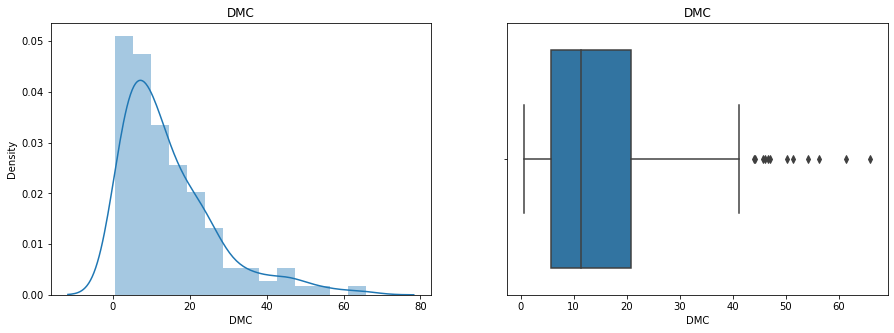

<Figure size 2160x1080 with 0 Axes>

In [235]:
plot_dist("DMC",df)

In [236]:
q1=df["DMC"].quantile(0.25)
q3=df["DMC"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [237]:
lower_fence,upper_fence

(-16.624999999999996, 43.175)

In [238]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [239]:
# extreme outliers
lower_extreme,upper_extreme

(-39.05, 65.6)

In [240]:
df["DMC"].describe()

count    244.000000
mean      14.673361
std       12.368039
min        0.700000
25%        5.800000
50%       11.300000
75%       20.750000
max       65.900000
Name: DMC, dtype: float64

In [241]:
data.loc[data["DMC"]>=upper_fence,"DMC"]=upper_fence

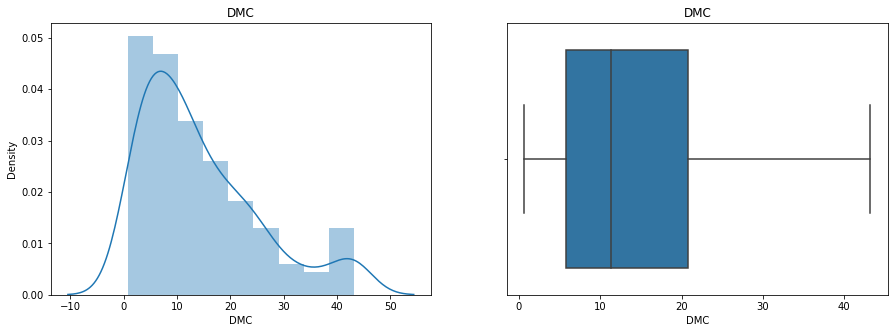

<Figure size 2160x1080 with 0 Axes>

In [242]:
plot_dist("DMC",data)

- **with respect to DC**

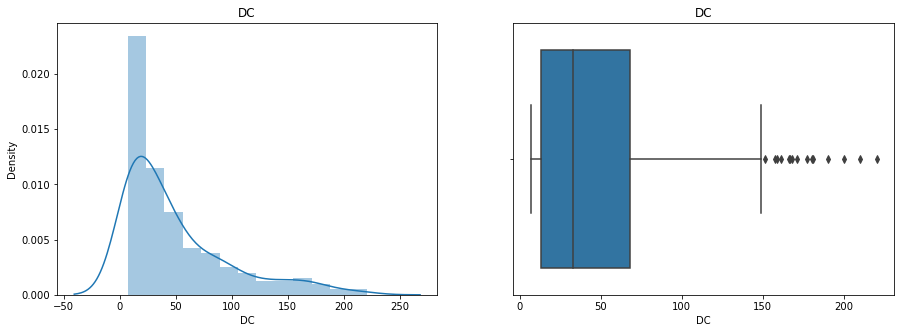

<Figure size 2160x1080 with 0 Axes>

In [243]:
plot_dist("DC",df)

In [244]:
q1=df["DC"].quantile(0.25)
q3=df["DC"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [245]:
lower_fence,upper_fence

(-69.03750000000002, 150.46250000000003)

In [246]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [247]:
# extreme values 
lower_extreme,upper_extreme

(-151.35000000000002, 232.77500000000003)

In [248]:
df["DC"].describe()

count    244.000000
mean      49.288484
std       47.619393
min        6.900000
25%       13.275000
50%       33.100000
75%       68.150000
max      220.400000
Name: DC, dtype: float64

In [249]:
data.loc[data["DC"]>=upper_fence,"DC"]=upper_fence

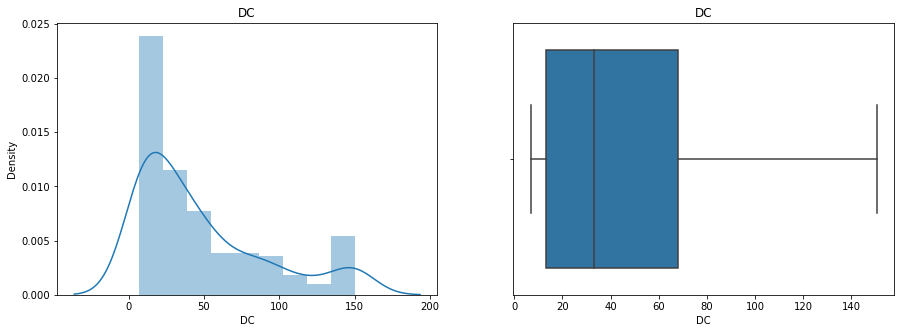

<Figure size 2160x1080 with 0 Axes>

In [250]:
plot_dist("DC",data)

- **with respect to BUI**

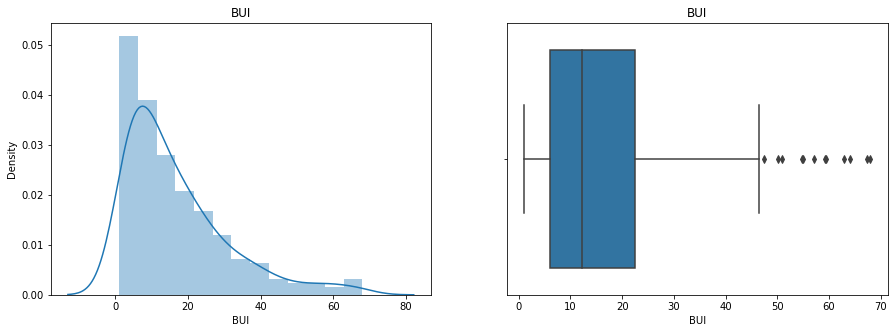

<Figure size 2160x1080 with 0 Axes>

In [251]:
plot_dist("BUI",df)

In [252]:
q1=df["BUI"].quantile(0.25)
q3=df["BUI"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [253]:
lower_fence,upper_fence

(-18.787499999999998, 47.3125)

In [254]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [255]:
# extreme values 
lower_extreme,upper_extreme

(-43.574999999999996, 72.1)

In [256]:
df["BUI"].describe()

count    244.000000
mean      16.664754
std       14.204824
min        1.100000
25%        6.000000
50%       12.250000
75%       22.525000
max       68.000000
Name: BUI, dtype: float64

In [257]:
data.loc[data["BUI"]>=upper_fence,"BUI"]=upper_fence

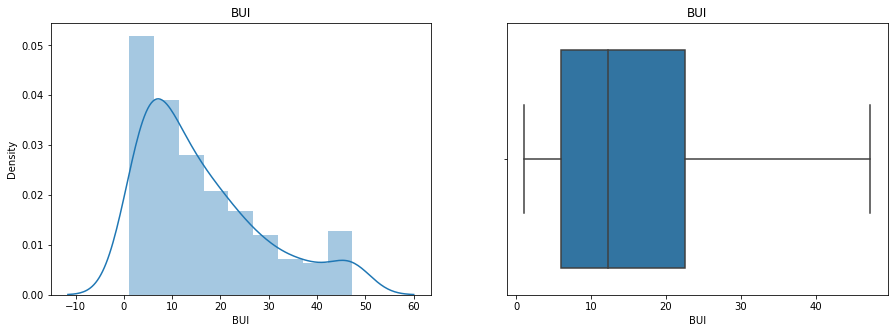

<Figure size 2160x1080 with 0 Axes>

In [258]:
plot_dist("BUI",data)

- **with respect to Rain**

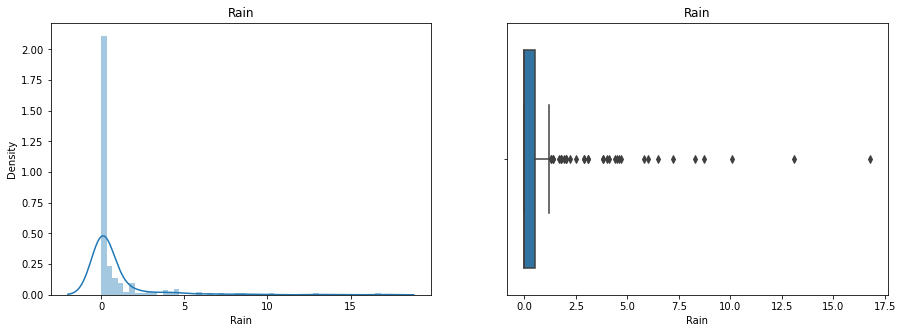

<Figure size 2160x1080 with 0 Axes>

In [259]:
plot_dist("Rain",df)

In [260]:
q1=df["Rain"].quantile(0.25)
q3=df["Rain"].quantile(0.75)
IQR=q3-q1
lower_fence=q1-1.5*IQR
upper_fence=q3+1.5*IQR

In [261]:
lower_fence,upper_fence

(-0.75, 1.25)

In [262]:
lower_extreme=q1-3*IQR
upper_extreme=q3+3*IQR

In [263]:
# extreme values 
lower_extreme,upper_extreme

(-1.5, 2.0)

In [264]:
df["Rain"].describe()

count    244.000000
mean       0.760656
std        1.999406
min        0.000000
25%        0.000000
50%        0.000000
75%        0.500000
max       16.800000
Name: Rain, dtype: float64

In [265]:
data.loc[data["Rain"]>=upper_extreme,"Rain"]=upper_extreme

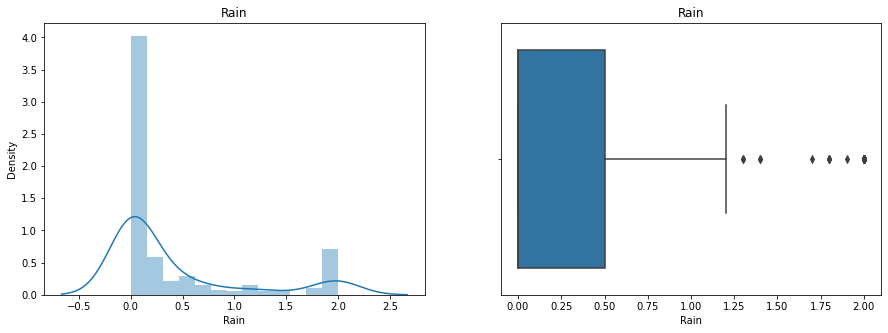

<Figure size 2160x1080 with 0 Axes>

In [266]:
plot_dist("Rain",data)

- **with respect to Temperature**

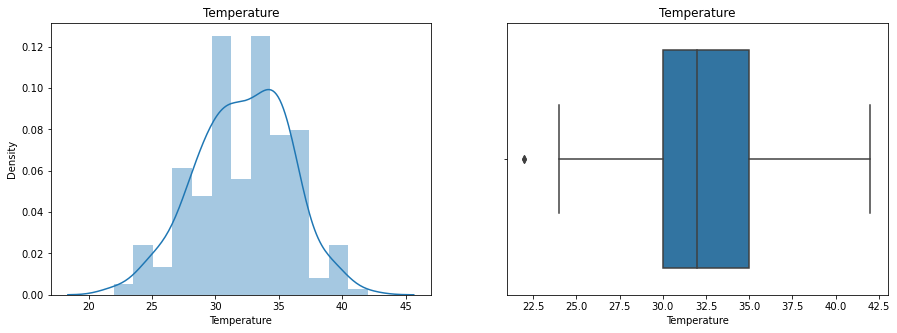

<Figure size 2160x1080 with 0 Axes>

In [267]:
plot_dist("Temperature",df)

In [268]:
#distribution is almost normal

In [269]:
Temp_mean=df.Temperature.mean()
Temp_mean

32.17213114754098

In [270]:
upper_boundary=Temp_mean +3*df.Temperature.std()
lower_boundary=Temp_mean -3*df.Temperature.std()

In [271]:
upper_boundary,lower_boundary

(43.073660927726394, 21.270601367355567)

In [272]:
data.loc[data["Temperature"]<=lower_boundary,"Temperature"]=lower_boundary

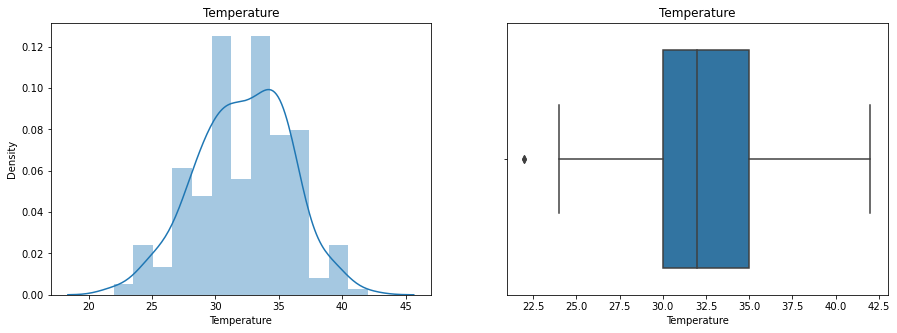

<Figure size 2160x1080 with 0 Axes>

In [273]:
plot_dist("Temperature",data)

In [274]:
# now we are good to go

- **handling null values**

In [275]:
data.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            1
Classes        1
Region         0
dtype: int64

## spliting the data before performing any operation

In [276]:
from sklearn.model_selection import StratifiedShuffleSplit

##### spliting the data based on the region

In [277]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.3,random_state=42)
for train_index,test_index in split.split(data,data["Region"]):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

In [278]:
strat_train_set["Region"].value_counts()

1    85
0    85
Name: Region, dtype: int64

In [279]:
strat_test_set["Region"].value_counts()

1    37
0    37
Name: Region, dtype: int64

In [280]:
x_train=strat_train_set.drop("Classes",axis=1)

In [281]:
y_train=strat_train_set["Classes"]

In [282]:
x_test=strat_test_set.drop("Classes",axis=1)

In [283]:
y_test=strat_test_set["Classes"]

### handeling null values in FWI (continious) and  in Region (discrete)

In [284]:
# for FWI   we are using median  to handel the null values
# for Region  we are filling the null values with the mode
median_FWI=x_train["FWI"].median()

In [285]:
median_FWI

4.0

In [286]:
x_train["FWI"].fillna(median_FWI,inplace=True)

In [287]:
x_test["FWI"].fillna(median_FWI,inplace=True)

In [288]:
y_train.isna().sum()
# replacing it with mode


1

In [289]:
mode_classes=str(y_train.mode().values[0])
mode_classes

'fire'

In [290]:
y_train.fillna(mode_classes,inplace=True)

In [291]:
y_train.isna().sum()

0

In [292]:
y_test.isna().sum()

0

### encoding the categorical data

##### with respect to classes we are dealing with nominal data with two categories .. so we are going to use one hot encoding

In [293]:
x_train.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
58,29,7,2012,32.0,73,15,0.0,86.6,26.7,127.0,5.6,35.0,11.9,1
126,5,6,2012,32.0,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,0
144,23,6,2012,33.0,59,16,0.8,74.2,7.0,8.3,1.6,6.7,0.8,0
202,20,8,2012,36.0,81,15,0.0,83.7,34.4,107.0,3.8,38.1,9.0,0
20,21,6,2012,30.0,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,1


In [294]:
y_train.head()

58         fire
126    not fire
144    not fire
202        fire
20         fire
Name: Classes, dtype: object

In [295]:
y_train=pd.get_dummies(y_train,drop_first=True)
y_test=pd.get_dummies(y_test,drop_first=True)

In [296]:
y_train.head()

,not fire
58,0
126,1
144,1
202,0
20,0


# sampling (undersampling techniques)


In [297]:
y_train.value_counts()

not fire
0           94
1           76
dtype: int64

In [298]:
from imblearn.under_sampling import RandomUnderSampler  
from collections import Counter # does value_counts
under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(x_train,y_train)

In [299]:
y_res.value_counts()

not fire
0           76
1           76
dtype: int64

In [300]:
X_res.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,6,7,2012,35.0,42,15,0.3,84.7,15.500,45.1,4.3,16.7000,6.3,0
1,8,6,2012,30.0,73,15,0.0,86.6,12.100,38.3,5.6,13.5000,7.1,1
2,24,8,2012,35.0,38,15,0.0,92.1,43.175,147.7,12.2,47.3125,26.9,0
3,12,8,2012,39.0,21,17,0.4,93.0,18.400,41.5,15.5,18.4000,18.8,0
4,21,8,2012,36.0,58,19,0.0,88.6,29.600,141.1,9.2,38.8000,18.4,1


In [301]:
y_res.head()

,not fire
0,0
1,0
2,0
3,0
4,0


In [302]:
X_res.shape,y_res.shape

((152, 14), (152, 1))

### Feature selection

##### Drop Constant Features Using Variance Threshold

In [303]:
### It will remove  zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_res) # you ave to do fit on x_train

VarianceThreshold(threshold=0)

In [304]:
var_thres.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [305]:
sum(var_thres.get_support())

13

In [306]:
constant_columns = [column for column in X_res.columns
                    if column not in X_res.columns[var_thres.get_support()]]

print(len(constant_columns))

1


In [307]:
for column in constant_columns:
    print(column)

year


In [308]:
X_res=X_res.drop(constant_columns,axis=1)

In [309]:
x_test=x_test.drop(constant_columns,axis=1)

In [310]:
X_res.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,6,7,35.0,42,15,0.3,84.7,15.500,45.1,4.3,16.7000,6.3,0
1,8,6,30.0,73,15,0.0,86.6,12.100,38.3,5.6,13.5000,7.1,1
2,24,8,35.0,38,15,0.0,92.1,43.175,147.7,12.2,47.3125,26.9,0
3,12,8,39.0,21,17,0.4,93.0,18.400,41.5,15.5,18.4000,18.8,0
4,21,8,36.0,58,19,0.0,88.6,29.600,141.1,9.2,38.8000,18.4,1


In [311]:
x_test.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
108,17,9,31.0,52,14,0.0,87.7000,6.400,24.3,6.2,7.7,5.9,1
40,11,7,33.0,76,14,0.0,81.1000,8.100,18.7,2.6,8.1,2.2,1
0,1,6,29.0,57,18,0.0,65.7000,3.400,7.6,1.3,3.4,0.5,1
214,1,9,29.0,86,16,0.0,47.7375,0.900,8.2,0.1,1.4,0.0,0
173,22,7,32.0,48,18,0.0,91.5000,43.175,90.1,13.2,44.0,25.4,0


##### pearson correlation

In [312]:
# if two  features are highly correlated ( not w.r.t target i m saying ) .then we can drop one of the feature as it is doing the same thing , for that we specify some threshold value

In [313]:
# taking a threshold value --> given by domain expert
# the time being we are taking threshold =0.95

In [314]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [315]:
# giving threshold 60 percent for the time 
threshold=0.95

In [316]:
correlation(X_res.iloc[:,:-1],threshold)

{'BUI'}

In [317]:
# so we are going to drop it

In [318]:
X_res=X_res.drop('BUI',axis=1)
x_test=x_test.drop('BUI',axis=1)

##### information gain

In [319]:
# from sklearn.feature_selection import mutual_info_classif # for classification
from sklearn.feature_selection import mutual_info_regression # for regression problem


In [320]:
mutual_info=mutual_info_regression(X_res,y_res)

In [321]:
mutual_data=pd.Series(mutual_info,index=X_res.columns)

In [322]:
mutual_data.sort_values(ascending=False)

ISI            0.673945
FFMC           0.648917
FWI            0.552588
DC             0.344056
DMC            0.311526
Rain           0.250146
RH             0.159388
Temperature    0.156029
month          0.045696
Ws             0.014870
day            0.000000
Region         0.000000
dtype: float64

In [ ]:
# droping day  and region as it is not contribution anything

In [325]:
X_res=X_res.drop(columns=["Region","day"],axis=1)

In [326]:
x_test=x_test.drop(columns=["Region","day"],axis=1)

In [327]:
# we do feature  selection w.r.t our training data only then remove from train and test.. to avoid overfitting

##### feature Importance

In [328]:
# This technique gives you a score for each feature of your data,the higher the score mor relevant it is

In [329]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X_res,y_res)

ExtraTreesClassifier()

In [330]:
print(model.feature_importances_)

[0.01128506 0.04473232 0.026177   0.01127853 0.11162087 0.2386939
 0.11530933 0.05320794 0.18320621 0.20448883]


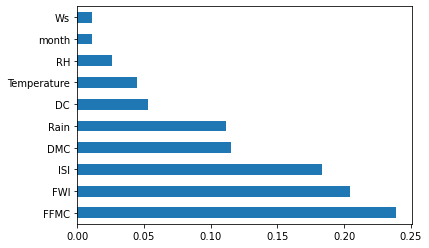

In [331]:
ranked_features=pd.Series(model.feature_importances_,index=X_res.columns)
ranked_features.nlargest(10).plot(kind="barh")
plt.show()

In [332]:
# these are the important features for our model so we are sticking to them 

In [333]:
X_res.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI
0,7,35.0,42,15,0.3,84.7,15.500,45.1,4.3,6.3
1,6,30.0,73,15,0.0,86.6,12.100,38.3,5.6,7.1
2,8,35.0,38,15,0.0,92.1,43.175,147.7,12.2,26.9
3,8,39.0,21,17,0.4,93.0,18.400,41.5,15.5,18.8
4,8,36.0,58,19,0.0,88.6,29.600,141.1,9.2,18.4


In [334]:
y_res.head()

,not fire
0,0
1,0
2,0
3,0
4,0


In [335]:
x_test.head()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,FWI
108,9,31.0,52,14,0.0,87.7000,6.400,24.3,6.2,5.9
40,7,33.0,76,14,0.0,81.1000,8.100,18.7,2.6,2.2
0,6,29.0,57,18,0.0,65.7000,3.400,7.6,1.3,0.5
214,9,29.0,86,16,0.0,47.7375,0.900,8.2,0.1,0.0
173,7,32.0,48,18,0.0,91.5000,43.175,90.1,13.2,25.4


In [336]:
y_test.head()

,not fire
108,0
40,1
0,1
214,1
173,0


## Target vs independent feature

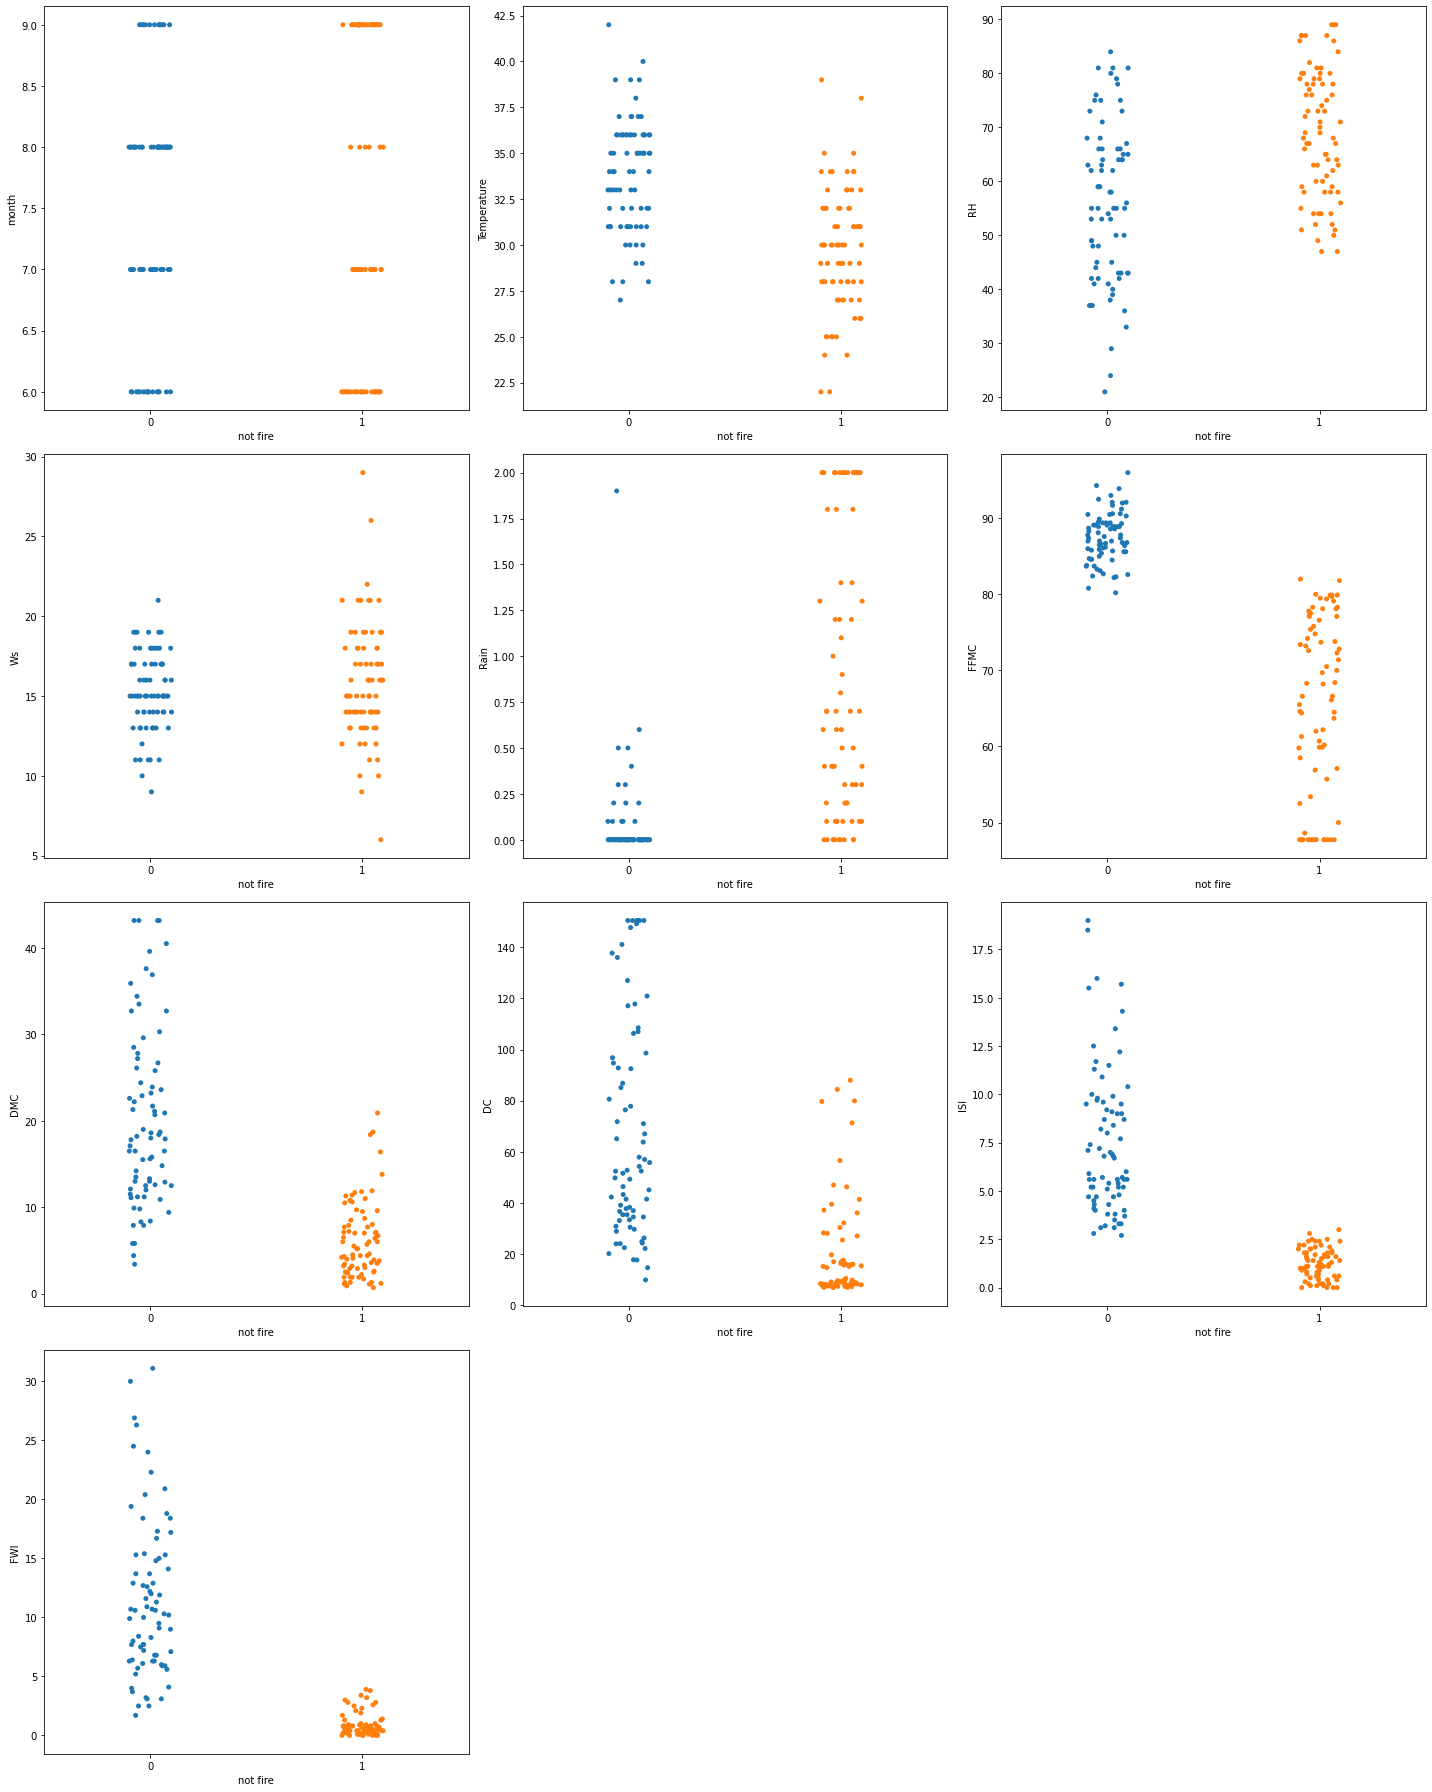

In [337]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X_res.columns:
    if plotnumber<=12 :
        ax = plt.subplot(4,3,plotnumber)
        sns.stripplot(y_res["not fire"],X_res[column])
    plotnumber+=1
plt.tight_layout()


## standardize the datasets

We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.

z=(x-x_mean)/std

In [338]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
s_x_train=scaler.fit_transform(X_res)
s_x_test=scaler.transform(x_test)

## model Training

#### model building

In [339]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(s_x_train,y_res)

LogisticRegression()

In [340]:
y_pred = log_reg.predict(s_x_test)

In [341]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

**accuracy**

In [342]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9459459459459459

**Confusion Matrix**

In [343]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[42,  2],
       [ 2, 28]], dtype=int64)

In [344]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [345]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)

**Precison**

In [346]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9545454545454546

**Recall**

In [347]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.9545454545454546

**F1 Score**

In [348]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9545454545454546